<a href="https://colab.research.google.com/github/Flyingzaptop/Python-Colab/blob/main/nika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 50)

[Опис даних](https://search.r-project.org/CRAN/refmans/PPtreeregViz/html/insurance.html)

In [12]:
df = pd.read_excel("NIKA1.xlsx")

In [13]:
# prompt: remove first column from dataset and rename other 3 columns to price, month and year, but leave indexes

df = df.iloc[:, 1:]
df = df.drop('t', axis = 1)
df = df.rename(columns={df.columns[0]: 'price', df.columns[1]: 'month', df.columns[2]: 'year'})
df

,price,month,year
0,42960.00,1,15
1,39520.00,2,15
2,42274.00,3,15
3,37905.00,4,15
4,36963.00,5,15
...,...,...,...
115,35380.91,8,24
116,34441.07,9,24
117,36018.16,10,24
118,36208.79,11,24


Epoch 1/500


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


108/108 - 2s - 22ms/step - loss: 0.0429
Epoch 2/500
108/108 - 1s - 6ms/step - loss: 0.0443
Epoch 3/500
108/108 - 1s - 6ms/step - loss: 0.0371
Epoch 4/500
108/108 - 0s - 4ms/step - loss: 0.0375
Epoch 5/500
108/108 - 1s - 6ms/step - loss: 0.0329
Epoch 6/500
108/108 - 1s - 6ms/step - loss: 0.0276
Epoch 7/500
108/108 - 0s - 4ms/step - loss: 0.0249
Epoch 8/500
108/108 - 1s - 5ms/step - loss: 0.0221
Epoch 9/500
108/108 - 1s - 6ms/step - loss: 0.0203
Epoch 10/500
108/108 - 1s - 6ms/step - loss: 0.0220
Epoch 11/500
108/108 - 0s - 4ms/step - loss: 0.0199
Epoch 12/500
108/108 - 1s - 6ms/step - loss: 0.0234
Epoch 13/500
108/108 - 1s - 5ms/step - loss: 0.0199
Epoch 14/500
108/108 - 1s - 6ms/step - loss: 0.0200
Epoch 15/500
108/108 - 0s - 4ms/step - loss: 0.0214
Epoch 16/500
108/108 - 0s - 4ms/step - loss: 0.0199
Epoch 17/500
108/108 - 1s - 7ms/step - loss: 0.0215
Epoch 18/500
108/108 - 1s - 7ms/step - loss: 0.0215
Epoch 19/500
108/108 - 0s - 4ms/step - loss: 0.0198
Epoch 20/500
108/108 - 1s - 6ms/

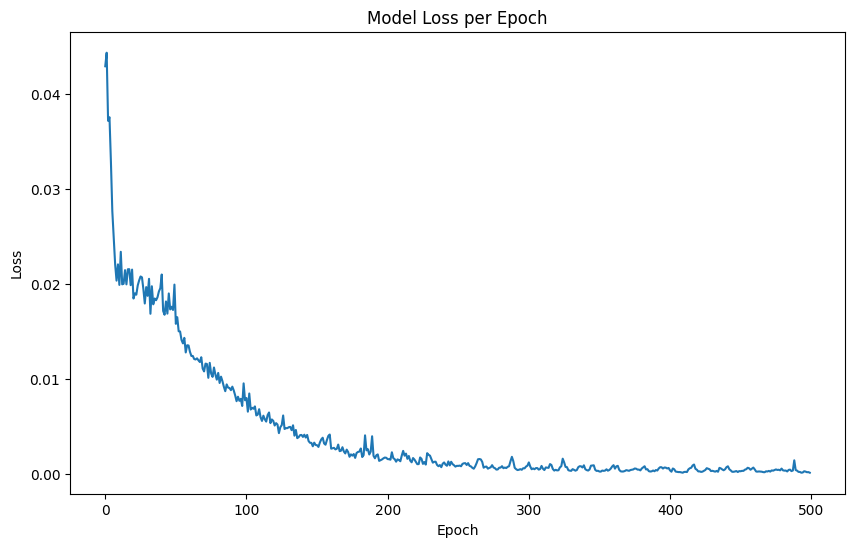

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


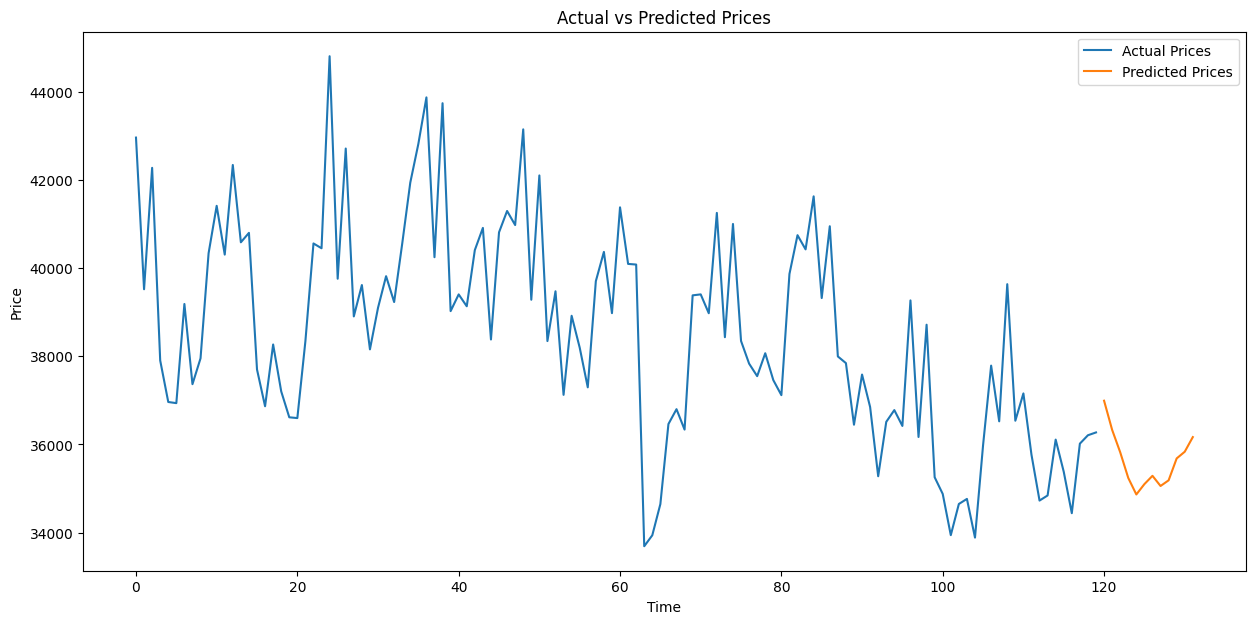

Predicted values for the next 12 periods:
[36992.062 36330.56  35822.727 35240.    34865.8   35100.65  35288.55
 35058.004 35186.117 35683.1   35835.004 36167.06 ]


In [17]:
# prompt: now, using that df, train model to predict next 12 values for price. It must be very accurate. Make plot, that will combine given and predicted values. Train model for 50 epochs and give its loss/epoch plot as well. After making plot - print out that values. P.s. DO NOT use datatime


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Preprocess the data
prices = df['price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(prices)

# Create the training dataset
def create_dataset(dataset, look_back=1):
  X, Y = [], []
  for i in range(len(dataset) - look_back):
    a = dataset[i:(i + look_back), 0]
    X.append(a)
    Y.append(dataset[i + look_back, 0])
  return np.array(X), np.array(Y)

look_back = 12
X_train, y_train = create_dataset(scaled_prices, look_back)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
history = model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=2)

# Plot training loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

# Prepare data for prediction
# We need the last 'look_back' values from the training data to predict the next values
last_sequence = scaled_prices[-look_back:].reshape(1, look_back, 1)

# Predict the next 12 values
predicted_scaled_prices = []
current_sequence = last_sequence

for _ in range(12):
  predicted_price = model.predict(current_sequence)
  predicted_scaled_prices.append(predicted_price[0, 0])
  # Update the sequence: remove the first value and add the predicted value
  current_sequence = np.roll(current_sequence, -1, axis=1)
  current_sequence[0, -1, 0] = predicted_price[0, 0]

# Inverse transform the predictions
predicted_prices = scaler.inverse_transform(np.array(predicted_scaled_prices).reshape(-1, 1))

# Combine actual and predicted values for plotting
actual_prices = df['price'].values
combined_prices = np.concatenate((actual_prices, predicted_prices.flatten()))

# Plot the combined values
plt.figure(figsize=(15, 7))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(np.arange(len(actual_prices), len(actual_prices) + 12), predicted_prices, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the predicted values
print("Predicted values for the next 12 periods:")
print(predicted_prices.flatten())
